In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab çalışma/Neıman/Mental_Health/Combined Data.csv'
df = pd.read_csv(file_path)

# **Initial Data Exploration**

In [4]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# **Data Cleaning**

In [6]:
# Drop the 'Unnamed: 0' column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)
# Check for missing values
df.isnull().sum()

statement    362
status         0
dtype: int64

# **Sentiment Distribution**

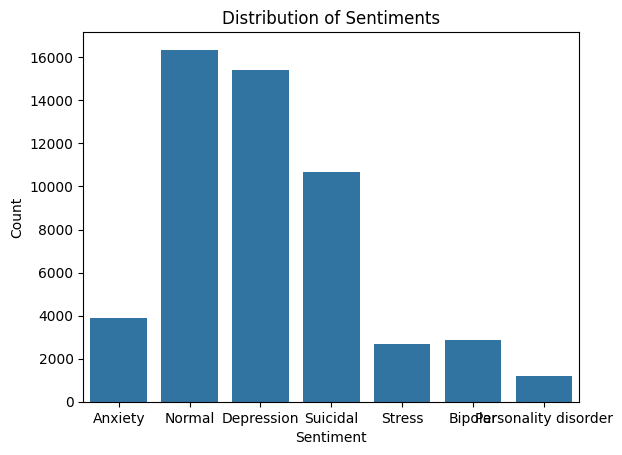

In [7]:
# Plot the distribution of sentiments
sns.countplot(x='status', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# **Text Preprocessing and Feature Extraction**

In [8]:
# Drop rows with missing statements
df.dropna(subset=['statement'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status'], test_size=0.2, random_state=42)
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# **Building a Sentiment Classifier**

In [9]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# **Evaluating the Model**

In [11]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


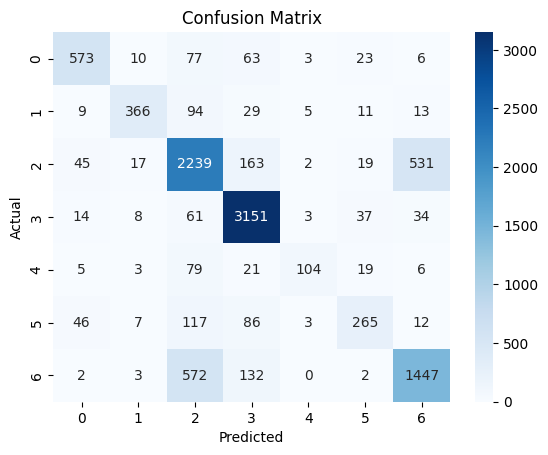

In [12]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Display the classification report
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.83      0.76      0.79       755
             Bipolar       0.88      0.69      0.78       527
          Depression       0.69      0.74      0.72      3016
              Normal       0.86      0.95      0.91      3308
Personality disorder       0.87      0.44      0.58       237
              Stress       0.70      0.49      0.58       536
            Suicidal       0.71      0.67      0.69      2158

            accuracy                           0.77     10537
           macro avg       0.79      0.68      0.72     10537
        weighted avg       0.77      0.77      0.77     10537

